```{contents}
```


## SVR

* **Support Vector Regression (SVR)** is an application of Support Vector Machines (SVM) for **regression problems**.
* Instead of predicting class labels, SVR predicts **continuous values**.
* The key idea: SVR tries to fit a function that approximates the data, while keeping errors within a certain tolerance.

---

### The Core Idea (ε-insensitive Tube)

SVR introduces the concept of an **ε-tube**:

* Predictions within ±ε from the true value are considered “good enough” → no penalty.
* Only predictions **outside** this tube contribute to the error.

---

### Mathematical Formulation

We want to find a function:

$$
f(x) = w^T \phi(x) + b
$$

that predicts targets $y$ given features $x$.

### Optimization Problem:

$$
\min_{w, b, \xi, \xi^*} \quad \frac{1}{2}\|w\|^2 + C \sum_{i=1}^N (\xi_i + \xi_i^*)
$$

subject to:

$$
y_i - w^T \phi(x_i) - b \leq \epsilon + \xi_i
$$

$$
w^T \phi(x_i) + b - y_i \leq \epsilon + \xi_i^*
$$

$$
\xi_i, \xi_i^* \geq 0
$$

---

### Explanation of Terms:

* $\frac{1}{2}\|w\|^2$: margin maximization (flatness of the function).
* $C$: regularization parameter, controls penalty for points outside the tube.
* $\epsilon$: tube width, tolerance for error.
* $\xi_i, \xi_i^*$: slack variables, measure deviations beyond ε.
* $\phi(x)$: kernel mapping.

---

### Hyperparameters in SVR

* **C** → Regularization (trade-off between flatness vs tolerance to errors).
* **ε (epsilon)** → Size of the ε-tube. Larger ε → simpler model, fewer support vectors.
* **γ (gamma)** → Kernel coefficient (in RBF, controls influence of single points).

---

### Kernels in SVR

Just like SVC, SVR can use different kernels:

* **Linear**: best for linear data.
* **RBF (default)**: captures nonlinear relationships.
* **Polynomial**: fits polynomial curves.

---

### Example in Python (Scikit-learn)



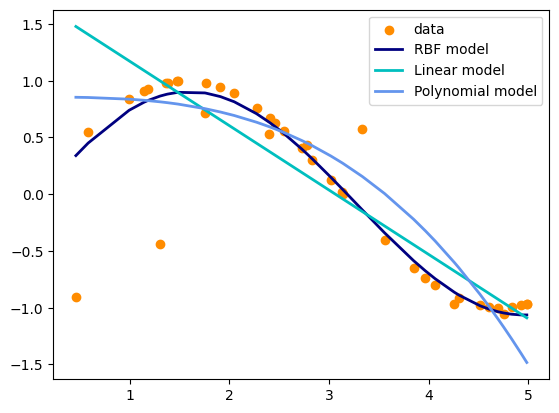

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate toy dataset
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))  # add noise

# Define SVR models
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, epsilon=0.1)
svr_poly = SVR(kernel='poly', C=100, degree=3, epsilon=0.1)

# Fit
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# Plot
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=2, label='RBF model')
plt.plot(X, y_lin, color='c', lw=2, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='Polynomial model')
plt.legend()
plt.show()


---

**Key Takeaways**

* SVR tries to keep predictions within an **ε-tube** around the true values.
* **C** → controls penalty for errors outside ε.
* **ε** → defines tolerance zone for errors.
* **γ** → controls influence range of training points in nonlinear kernels.
* Flexible → can capture both linear and nonlinear regression patterns